<a href="https://colab.research.google.com/github/Kalid98/Talatou/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importation de librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.lib.function_base import median
#Pour rendre le graphique interactif, on importe les élements de la librairie ipywidgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# Les differents algorithmes nécessaires :
from sklearn.linear_model import LogisticRegression # regression logistic
from sklearn.ensemble import RandomForestClassifier # Foret aléatoire
from sklearn.neural_network import MLPClassifier   # Réseau de neurone artificielle
from sklearn .svm import SVC                        #support vector machine : le classificateur pour trouver
                                                    # le meilleur hyperplan de la variable cible

from sklearn.model_selection import GridSearchCV    # chercher les meilleurs hyper-paramètres pour nos algorithmes
from sklearn.metrics import classification_report   # Qui stock plusierus métriques comme la precision du modele, le F1 score
from sklearn.feature_selection import RFE           # Selection de variables predictrices importante :reduire la dimentionalité
                                                    #de notre jeux de donnée tout en preservant la performance des algorithlmes

In [ ]:
#Importation de données
data = pd.read_csv('/content/Customer Churn.csv')
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


ANALYSE EXPLORATOIRE DE NOS DONNEES : elle permet de mieux comprendre les données et de comprendre le type de prétraitement de données à éffectuer .

In [ ]:
# Voir l'étendue de notre base de données
data.shape

(3150, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
#Voir le nombre de vzriables manquantes par variables
data.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [ ]:
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [ ]:
#Pour voir  le nombre de valeur unique par colonne : elle nous donne le nombre
#de valeurs dictinctes au niveau de chaque colonne
data.nunique()

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
Churn                         2
dtype: int64

STATISTIQUES DESCRIPTIVE

In [ ]:
# Calcul des moyennes pour les colonnes spécifiées
columns_to_calculate_mean = ['Seconds of Use','Frequency of use','Frequency of SMS','Age','Customer Value']
mean_values = data[columns_to_calculate_mean].mean()

print("Moyennes :\n", mean_values)

Moyennes :
 Seconds of Use      4472.459683
Frequency of use      69.460635
Frequency of SMS      73.174921
Age                   30.998413
Customer Value       470.972916
dtype: float64


In [ ]:
#Calcul de mediane
columns_to_calculate_median= ['Seconds of Use','Frequency of use','Frequency of SMS','Age','Customer Value']
median_values = data[columns_to_calculate_median].median()

print("Medianes:\n", median_values)

Medianes:
 Seconds of Use      2990.00
Frequency of use      54.00
Frequency of SMS      21.00
Age                   30.00
Customer Value       228.48
dtype: float64


In [ ]:
#Calcul de l'écart type
column_ecart_types = ['Seconds of Use','Frequency of use','Frequency of SMS','Age','Customer Value']
ecart_type_values = data[column_ecart_types].std()

print("Ecart_types:\n", ecart_type_values)

Ecart_types:
 Seconds of Use      4197.908687
Frequency of use      57.413308
Frequency of SMS     112.237560
Age                    8.831095
Customer Value       517.015433
dtype: float64


In [ ]:
# Colonnes pour lesquelles vous voulez calculer les quantiles
columns_to_calculate_quantiles = ['Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Age', 'Customer Value']

# Calcul des quantiles pour les colonnes spécifiées
quantiles = data[columns_to_calculate_quantiles].quantile([0.25, 0.5, 0.75])

print("Quantiles :\n", quantiles)

Quantiles :
       Seconds of Use  Frequency of use  Frequency of SMS   Age  Customer Value
0.25         1391.25              27.0               6.0  25.0       113.80125
0.50         2990.00              54.0              21.0  30.0       228.48000
0.75         6478.25              95.0              87.0  30.0       788.38875


VISUALISATIONS

In [ ]:
#Variables catégorielles : celles ayant moins de 5 modalités
#NB: to_list() pour convertir les noms de colonnes en une liste
categorical_columns = data.nunique()[data.nunique()<6].keys().to_list()
categorical_columns

['Complains', 'Age Group', 'Tariff Plan', 'Status', 'Age', 'Churn']

In [ ]:
#Presenter les variables sous forme de colonne :
for column in categorical_columns:
    print(column)

Complains
Age Group
Tariff Plan
Status
Age
Churn


In [ ]:
# Créons une fonction permettant de construire un diagramme à barre pour ces variables
# Puis qu'elles sont nombreuses, on va le faire de manière inter-active en utilisant les outils de la librairie (itywidgets)
def bar_plot(a):
  data[a].value_counts(normalize = True).plot(kind = 'bar')
  plt.ylabel('proportion')
  plt.title('Distribution of'+ str(a))
  return plt.show()

**# Utiliser la fonction interact pour créer nos graphes inter-actives**

In [ ]:
# Pour réaliser des graphiques
import seaborn as sns
import matplotlib.pyplot as plt
# Pour inclure les graphes à notre notebook et ne pas les avoirs separées
%matplotlib inline

#Pour rendre le graphique interactif, on importe les élements de la librairie ipywidgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [ ]:
#on met a= puis on liste les elements que l'on veut tracer
interact(bar_plot, a = categorical_columns)

interactive(children=(Dropdown(description='a', options=('Complains', 'Age Group', 'Tariff Plan', 'Status', 'A…

<function __main__.bar_plot(a)>

Le pourcentage de clients fidèles est superieur à celui de clients non fidèles (plus de 85% contre moins de 15%).
On remarque qu'au niveau de notre target (churn) il ya un probleme de desequilibre de classe qu'il faut resoudre car cela peut affecter negativement notre modèle.

ANALYSE UNIVARIEE DE VARIABLES QUANTITATIVES

In [ ]:
#Variables quantitatives
numerical_columns = ['Frequency of use','Frequency of SMS','Customer Value','Seconds of Use']

# Création d'une fonction de construction d'histogramme de manière interactive
def hist_plot (b):
  sns.distplot(data[b], kde=False)
  plt.title('Histogram of'+str(b))
  return plt.show()
#Avant d'afficher l'histogramme, il faut convertir le type de la variable 'TotalCharges' en float
#data['Customer Value'] = data['Customer Value'].replace(' ',np.nan).astype(float)

In [ ]:
#Voir le nombre de variables manquantes par variables
data.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [ ]:
#Afficher les histogrammes avec la fonction (interact)
interact(hist_plot, b = numerical_columns);

interactive(children=(Dropdown(description='b', options=('Frequency of use', 'Frequency of SMS', 'Customer Val…

In [ ]:
#Coefficient d'asymetrie de la variable customer Value
data['Seconds of Use'].skew()
# On voit que ce coef est très grand(tend vers 1) donc Asymétrique
 #il faut transformer la variable afin de la rendre plus symétrique (Dans le prétraitement)

1.3219428645354965

In [ ]:
#Coefficient d'asymetrie de la variable customer Value
data['Frequency of SMS'].skew()
# On voit que ce coef est très grand(tend vers 1) donc Asymétrique
 #il faut transformer la variable afin de la rendre plus symétrique (Dans le prétraitement)

1.9741417670137227

In [ ]:
#Coefficient d'asymetrie de la variable customer Value
data['Frequency of use'].skew()
# On voit que ce coef est très grand(tend vers 1) donc Asymétrique
 #il faut transformer la variable afin de la rendre plus symétrique (Dans le prétraitement)

1.1441664249623964

In [ ]:
#Coefficient d'asymetrie de la variable customer Value
data['Customer Value'].skew()
# On voit que ce coef est très grand(tend vers 1) donc Asymétrique
 #il faut transformer la variable afin de la rendre plus symétrique (Dans le prétraitement)

1.4272916100327098

Vérifions à présent l'existance ou non de valeurs abérantes grace aux boites à moustaches.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Construction de la fonction de création de boîtes à moustaches
def box_plot(b):
    sns.boxplot(y=data[b])
    plt.title('Boxplot of ' + str(b))
    plt.show()  # Affiche le graphique au lieu d'utiliser plt.shox()

# Interact
interact(box_plot, b=numerical_columns)

interactive(children=(Dropdown(description='b', options=('Frequency of use', 'Frequency of SMS', 'Customer Val…

<function __main__.box_plot(b)>

On remarque que ces variables continues non seulement sont fortement asymétriques , mais aussi contiennet des valeurs abérrantes .



MATRICE DE CORRELATION

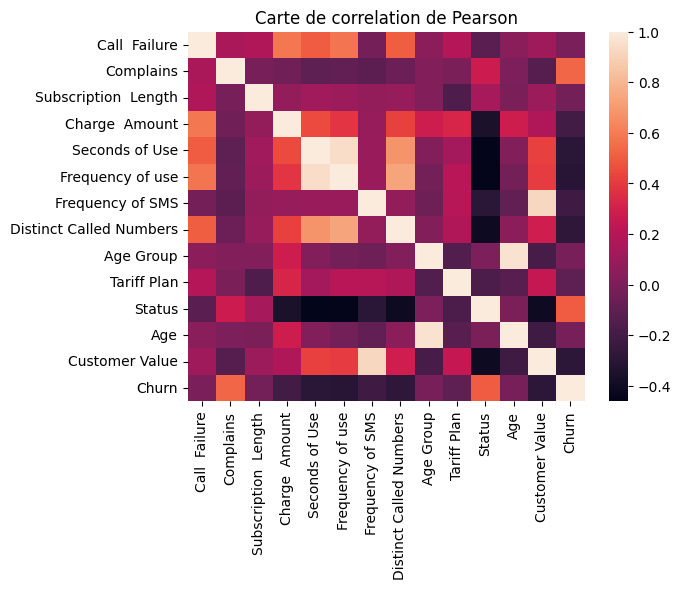

In [ ]:
#Matrice de correlation : plus la couleur est proche de 1 , plus les avriables ont une fortes correlation .
sns.heatmap(data.corr()).set_title('Carte de correlation de Pearson');

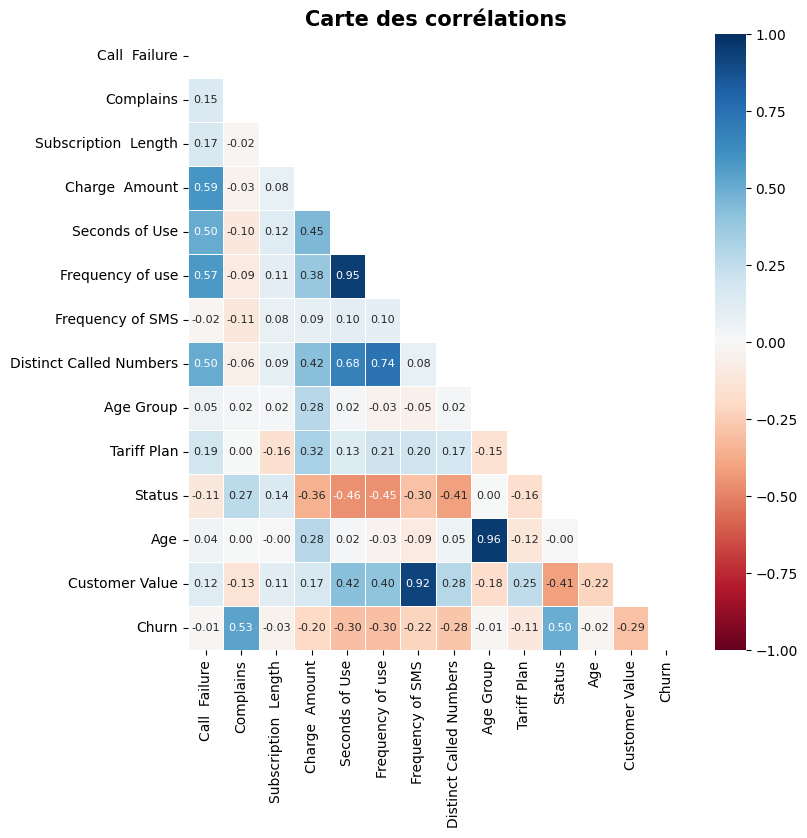

In [ ]:
#La matrice optimale : masquer la seconde moitier de la matrice
# Créez un masque pour masquer le triangle inférieur
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# Créez la carte de chaleur avec des annotations ajustées
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), mask=mask, center=0, cmap='RdBu',
            linewidths=0.5, annot=True, fmt=".2f", vmin=-1, vmax=1,
            annot_kws={"size": 8})  # Ajustez la taille de la police ici
plt.title('Carte des corrélations', fontsize=15, fontweight='bold')
plt.show()

ANALYSE BIVARIEES


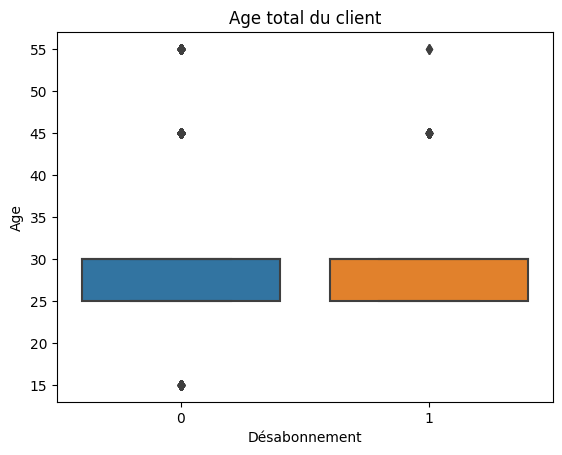

In [ ]:
 # Age vs Churn : on voit que l'age n'a aucun impact sur le desabonnement ou non du client.

 sns.boxplot(x= 'Churn', y= 'Age', data=data)
 plt.xlabel('Désabonnement')
 plt.ylabel('Age')
 plt.title('Age total du client')
 plt.show()

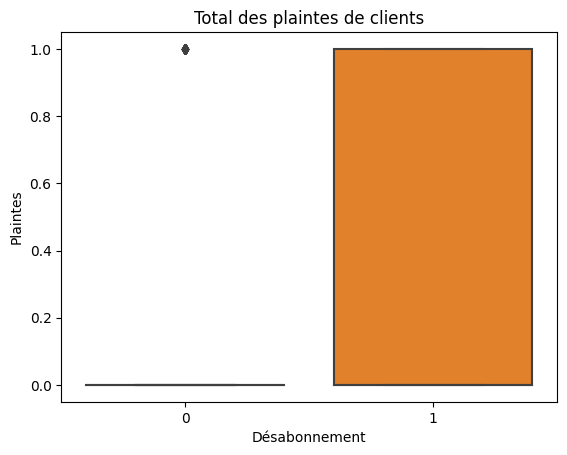

In [ ]:
 # Complains vs Churn : on remarque que seul les client qui se sont plaints se sont desabonné.

 sns.boxplot(x= 'Churn', y= 'Complains', data=data)
 plt.xlabel('Désabonnement')
 plt.ylabel('Plaintes')
 plt.title('Total des plaintes de clients')
 plt.show()

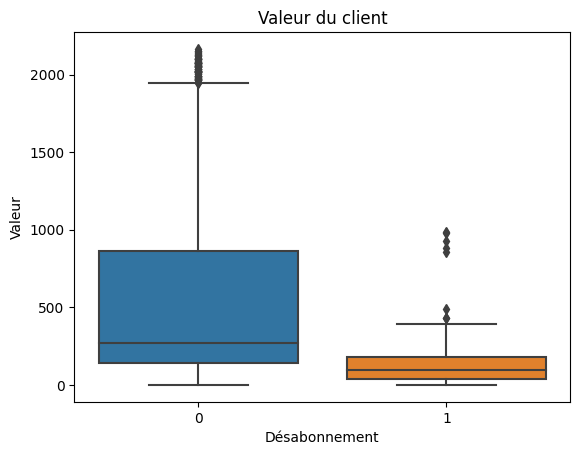

In [ ]:
# Customer Value vs churn : les clients qui se désabonnent sont ceux qui ont une valeur moindre
sns.boxplot(x='Churn', y='Customer Value', data=data)
plt.xlabel('Désabonnement')
plt.ylabel('Valeur')
plt.title('Valeur du client')
plt.show()

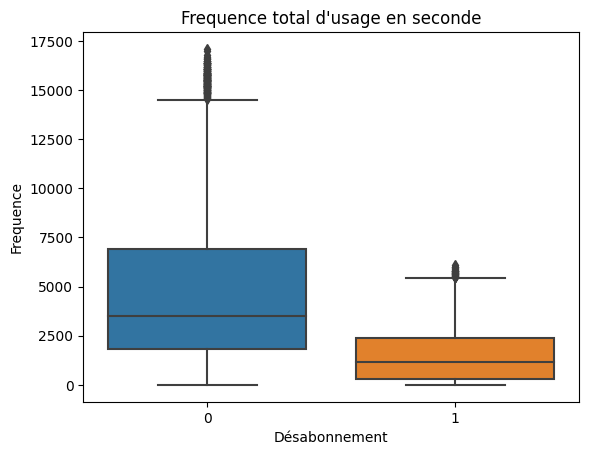

In [ ]:
#Customer Value vs churn : les clients avec le moins de secondes d'usage sont cexu qui se desabonnent le plus et ils sont moins nombreux

sns.boxplot(x='Churn', y='Seconds of Use', data=data)
plt.xlabel('Désabonnement')
plt.ylabel('Frequence')
plt.title('Frequence total d\'usage en seconde')
plt.show()

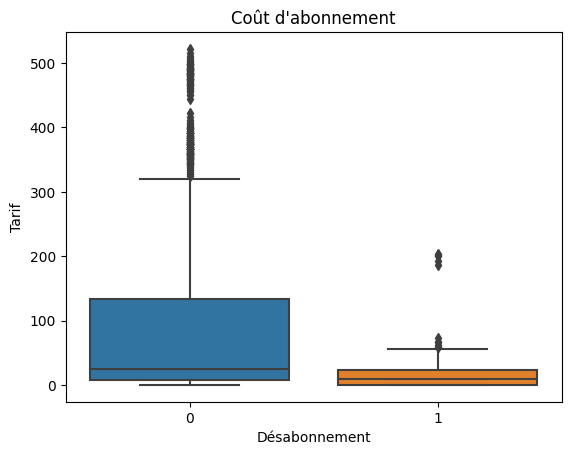

In [ ]:
# Frequency of SMS vs Churn : meme conclusion que l'analyse précedente
sns.boxplot(x='Churn', y='Frequency of SMS', data=data)
plt.xlabel('Désabonnement')
plt.ylabel('Tarif')
plt.title('Coût d\'abonnement')
plt.show()

A la suite de ces analyses , on relève 2 problèmes majeurs : Asymétrie des données et présence de valeurs abérrantes .

L'asymétrie dans les données peut affecter la performance des modèles, en particulier des modèles basés sur des hypothèses de normalité. Pour traiter l'asymétrie, vous pouvez envisager : La transformation et la standardisation des données.

Les valeurs aberrantes peuvent fausser les résultats et la robustesse du modèle. Voici quelques étapes pour traiter les valeurs aberrantes :

•	Identification : Utilisez des méthodes comme les diagrammes de boîte à moustaches (box plots), les diagrammes de dispersion ou des méthodes statistiques pour identifier les valeurs aberrantes dans vos données.

•	Traitement : Vous pouvez choisir de supprimer les valeurs aberrantes si elles sont vraiment des erreurs ou si elles ne représentent pas bien le comportement général. Sinon, vous pouvez utiliser des techniques de transformation comme la troncature ou la capping pour réduire leur impact.

•	Utilisation de modèles robustes : Certains modèles sont moins sensibles aux valeurs aberrantes que d'autres. Par exemple, les modèles basés sur les arbres de décision et les mo-dèles de forêt aléatoire peuvent mieux gérer les valeurs aberrantes car ils effectuent des coupures binaires répétées.


RESUMES STATISTIQUES

In [ ]:
#
data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [ ]:
#La description de nos 4 variables quantitatives

# Liste des noms de colonnes que vous souhaitez inclure dans la description
colonnes_a_inclure = ['Frequency of use','Customer Value','Complains','Age']

# Générer les statistiques uniquement pour les colonnes spécifiées
description_limitée = data[colonnes_a_inclure].describe()

print(description_limitée)

       Frequency of use  Customer Value    Complains          Age
count       3150.000000     3150.000000  3150.000000  3150.000000
mean          69.460635      470.972916     0.076508    30.998413
std           57.413308      517.015433     0.265851     8.831095
min            0.000000        0.000000     0.000000    15.000000
25%           27.000000      113.801250     0.000000    25.000000
50%           54.000000      228.480000     0.000000    30.000000
75%           95.000000      788.388750     0.000000    30.000000
max          255.000000     2165.280000     1.000000    55.000000


Les  trois variables quantitatives (Frequency of use,Customer Value,Age) ont differentes échelles . Frequency of use varie de 0 à 255 , Customer Value varie de 0 à 2165 , Age varie de 15 à 55 . De nombreux modèles de Machine learning et de Deep learning fonctionnent mieux avec des variables standardisées ou normalisées.
Donc  il faudra penser à standardiser les données dans la section de prétraitement des données .

PRETRAITEMENT DE DONNEES

In [ ]:
from sklearn.preprocessing import MinMaxScaler       # MinMaxscaler est une fonction de normalisation de données

In [ ]:
##1-Gestion de valeurs manquantes

#Créons une copie de notre base de données afin de la dataframe originelle (data) intacte .
data_copie = data.copy()
#Vérification d'absence ou non de valeur abérrante
data_copie.isna().sum()


Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

Remarque : Absence de valeurs manquantes

2-ENCODAGE DES VARIABLES : On remarque que toutes les variables contiennnent uniquement des valeurs numériques et non des valeurs chaines de caractères  .Donc on a pas besoin d'encoder quoique ce soit .

TRANSFORMATION DE VARIABLES

<ipython-input-38-fb182e9b3586>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Customer Value'], kde=False); # L'argument kde=False indique que vous ne souhaitez pas tracer la fonction de densité estimée (Kernel Density Estimation) par-dessus l'histogramme


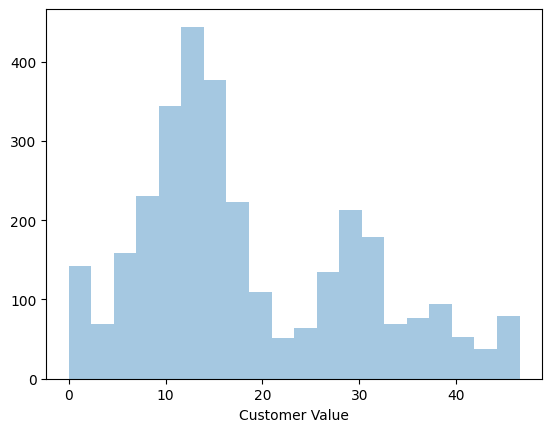

In [ ]:
# La variable Customer Value étant asymétrique , utilisons la transformation racine carrée pour réduire l'asymétrie .

data['Customer Value'] = np.sqrt(data['Customer Value'])

##Histogramme de la variable transformée : on remarque qu'il est moins asymétrique

sns.distplot(data['Customer Value'], kde=False); # L'argument kde=False indique que vous ne souhaitez pas tracer la fonction de densité estimée (Kernel Density Estimation) par-dessus l'histogramme

Remarque :  La distribution est mois asymétrique.

In [ ]:
# revefions celà en calculant le coefficient d'asymétrie de cette variable
data['Customer Value'].skew()   # on a quitté de 1.4 à 0.6 donc une réduction de presque la moitié

0.6237200901031904

**DIVISION** DE NOS DONNEES : entreinnement , validation et test .

In [ ]:
from sklearn.model_selection import train_test_split # Pour diviser notre dataset en 3 : Trainning , Validation et test
from sklearn.utils import resample                   # réechantillonner les données

In [ ]:
#Données d'entrainement (60%) , de validation (20%) et de test (20%) : Double vérification ou double sécutrité
#Les données de validation : pour pouvoir selectionner le meilleur modèle sur  lequel on va enfin tester
#Données d'entrainement : pour entrainner le modèle, Validation : pour selectionner le mailleur modèle ,
# test : pour évaluer le modèle selectionné .Donc il sagit d'une double vérification.

x = data.drop('Churn', axis = 1)    # Notre variable endogène ou indépendante (qui est la dataframe sans churn)

y = data['Churn']                    # Notre variable indépendante ou expliquée (qui est churn)

seed=111 #La méthode seed() est utilisée pour initialiser le générateur de nombres aléatoires.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = seed, stratify = y)

#stratify = y permet de s'assurer qu'on a la meme proportion de classe au niveau de la variable cible.

#Divisons le données de test créées en 2 parties égales pour former les données de validation et de test.

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = seed, stratify = y_test)

Il faut s'assurer que la proportion de personnes ayant résiliées ou non leur contrat soit=eent les meme dans les différents ensembles de données.

In [ ]:
#Fréquence des classes dasn y
pd.DataFrame (y).value_counts(normalize=True)

Churn
0        0.842857
1        0.157143
dtype: float64

In [ ]:
#Fréquence des classes dasn y_train
pd.DataFrame (y_train).value_counts(normalize=True)

Churn
0        0.842857
1        0.157143
dtype: float64

In [ ]:
#Fréquence des classes dasn y_val
pd.DataFrame (y_val).value_counts(normalize=True)

Churn
0        0.842857
1        0.157143
dtype: float64

In [ ]:
#Fréquence des classes dans y_test
pd.DataFrame (y_test).value_counts(normalize=True)

Churn
0        0.842857
1        0.157143
dtype: float64

On remarque qu'on a les memes proportions partout

NORMALISATION DES VARIABLES : Résolvons le probleme de désequilibre

Attaquons nous au problème de désequilibre de classes dans les données . Lorsqu'il ya une très grande difference entre le nombre d'observations dans chaque categories de la variable target, cela peut entrainnner des erreurs de modélisation. Ici il ya plus de 80% des personnes qui n'oint pas résiliés leur abvonnement contre 15% qui l'on fait. Il ya donc un très grand déséquilibre de classes. On peut donc utiliser le réechantillonnage pour réequilibrer les classes . Soit on fait su suréchantillonnage dans la classe minoritaire(modalité1), soit on fait du sous-écahntillonnage dans la classe majoritaire(modalité2).

In [ ]:
#Méthode de suréchantillonnage de la classe minorotaire.

X2 = x_train                #Création de la copie de nos données d'entrainnement


X2['Churn'] = y_train.values  #Ajout la variable cible à cette copie

minority = X2[X2.Churn == 1]  #Filtrage pour obtenir uniquement les observations minoritaires

majority = X2[X2.Churn == 0]  #Filtrage pour obtenir uniquement les observations majoritaires

minority_upsampled = resample(minority, replace = True, n_samples = len(majority), random_state = seed) # Application de la fonction de surécantillonnage (resample)

upsampled = pd.concat([majority, minority_upsampled]) # On concatene les DataFrames majority et minority_upsampled

#pour créer un nouvel ensemble de données "upsampled" où les classes sont maintenant équilibrées.

upsampled # On obtient donc la nouvelle data frame obtenue à partir de la méthode se surechantillonnage

#NB: replace = False signifie tirage avec remise

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
2041,0,0,24,0,520,4,14,1,4,1,2,45,6.935416,0
964,9,0,37,0,15485,182,150,30,2,1,1,25,37.148553,0
1600,3,0,37,0,4180,71,30,19,3,1,1,30,17.030561,0
1697,3,0,13,1,2433,33,0,13,3,1,1,30,9.931767,0
163,5,0,42,2,3175,29,493,12,3,1,1,30,45.827503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0,1,3,0,1228,9,0,1,2,1,1,25,7.460898,1
2078,0,1,34,0,0,0,0,0,3,1,2,30,0.000000,1
2074,8,0,34,0,5513,92,19,22,2,1,1,25,18.377296,1
2777,16,1,38,0,2763,51,50,36,4,1,2,45,13.976766,1


In [ ]:
# Vérification de la resolution du probleme de desequilibre

upsampled['Churn'].value_counts(normalize = True) # Equilibre parfait avec 50/50

0    0.5
1    0.5
Name: Churn, dtype: float64

In [ ]:
# Données d'entrainnement sur la base de methode de surechantillonnage de la classe minoritaire
x_train_up = upsampled.drop('Churn', axis=1)
y_train_up = upsampled['Churn']

In [ ]:
# Résolution du prob de desequilibre méthode de sous-échantillonnage de la classe majoritaire.
majority_downsampled = resample(majority, replace = False, n_samples = len(minority), random_state = seed)
downsampled = pd.concat([minority, majority_downsampled])
downsampled

#NB: replace = False signifie tirage sans remise : on aura moins d'observations

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
2477,16,1,41,0,2753,58,52,38,4,1,2,45,14.151855,1
2122,28,0,35,0,1260,53,23,19,3,1,2,30,12.021647,1
1068,0,0,35,0,0,0,0,0,2,1,2,25,0.000000,1
672,25,1,33,0,1145,48,25,20,2,1,2,25,12.891276,1
1028,0,0,36,0,133,2,0,2,3,1,2,30,2.323790,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,31,1,32,4,16785,249,8,80,2,1,1,25,28.328960,0
125,0,0,32,0,2780,19,0,12,3,1,1,30,10.581115,0
2188,12,0,31,3,1680,45,205,15,3,2,1,30,29.816103,0
1147,6,0,16,3,2608,42,29,19,3,1,1,30,14.899664,0


In [ ]:
#Vérification
downsampled['Churn'].value_counts(normalize=True)

1    0.5
0    0.5
Name: Churn, dtype: float64

In [ ]:
# Données d'entrainnement sur la base de methode de sousechantillonnage de la classe majoritaire
X_train_down = downsampled.drop('Churn', axis= 1)
y_train_down = downsampled['Churn']

Redefinissons le X_train et le y_train


In [ ]:
y_train = x_train['Churn']               # Variable expliquée
x_train = x_train.drop('Churn', axis=1)  #Variable explicative sans churn

In [ ]:
#Définition des données d'entrainnement
 #Choix possibles de données  : (X_train, y_train), (X_train_up, y_train_up) et (X_train_down, y_train_train_down)
 #Choix numéro 1 : les données de surechantillonnage

train_features = x_train_up
train_labels = y_train_up

#Pour avoir la   possibilite de pouvoir utiliser le type de données qu'on veut en changeant juste le (train_features et train_labels)

NORMALIsATION DES DONNEES :
Après le probleme de déséquilibre de classes , passons à la prochaine étape qui est celle de normalisation des données.



La standardisation consiste à remplacer les valeurs réelles par le z_score = ((Valeur_de_la_variable - Moyenne_de_la_variable)/(ecart_type_de_la_variable))

In [ ]:
#Normalisation des variables independantes des differents ensembles de données
           # On peut choisir de standardiser au lieu de normaliser
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()       # Appel à la focntion MinMaxscaler pour la normalisation

#Entrainons l'algo  à partir des données d'entrainnement

mod_scaler = scaler.fit(train_features)

train_features = mod_scaler.transform(train_features) # Transformation des differents ensembles de données
x_val = mod_scaler.transform(x_val)                    # Pareil pour mes données de validation
x_test = mod_scaler.transform(x_test)                 #Pareil pour mes données de test

# Retransformation  en dataframe

train_features = pd.DataFrame(train_features, columns = x.columns)
x_val= pd.DataFrame(x_val, columns = x.columns)
x_test= pd.DataFrame(x_test, columns = x.columns)

In [ ]:
#Vérifier que Toutes les valeurs sont maintenant entre 0 et 1
train_features.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
count,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000
mean,0.227459,0.213434,0.679156,0.064909,0.196165,0.211203,0.093589,0.206950,0.448368,0.047395,0.448839,0.391086,0.320461
std,0.220723,0.409796,0.209305,0.126661,0.216872,0.198712,0.174109,0.168827,0.204161,0.212515,0.497454,0.199111,0.220002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.028571,0.000000,0.627907,0.000000,0.050045,0.062992,0.003831,0.075269,0.250000,0.000000,0.000000,0.250000,0.178089
50%,0.171429,0.000000,0.744186,0.000000,0.124397,0.161417,0.030651,0.182796,0.500000,0.000000,0.000000,0.375000,0.275981
75%,0.342857,0.000000,0.813953,0.100000,0.260575,0.302165,0.068966,0.301075,0.500000,0.000000,1.000000,0.375000,0.385087
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


MODELISATION : Après la normalisation , passons maintenant à la modélisation .

Pour l'évaluation de la performance du modèle , nous choisissons le F1 score

In [ ]:
# Séléction des variables prédictrices pour notre algorithme
 # Foret aléatoire
rf = RandomForestClassifier()        # Création de la classe rendomForestClassifier car ont est en face d'un probleme de classification

rf.fit(train_features , train_labels)  # entrainner avec les données d'antrainement

print(classification_report(y_val, rf.predict(x_val)))   #Afficher le rapport de classification qui va permetttre de visualiser le métriques

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       531
           1       0.85      0.84      0.84        99

    accuracy                           0.95       630
   macro avg       0.91      0.91      0.91       630
weighted avg       0.95      0.95      0.95       630



Remarque : Le modèle se comporte très bien face aux observations de la classe 0 malgré le problème de desequilibre réglé.

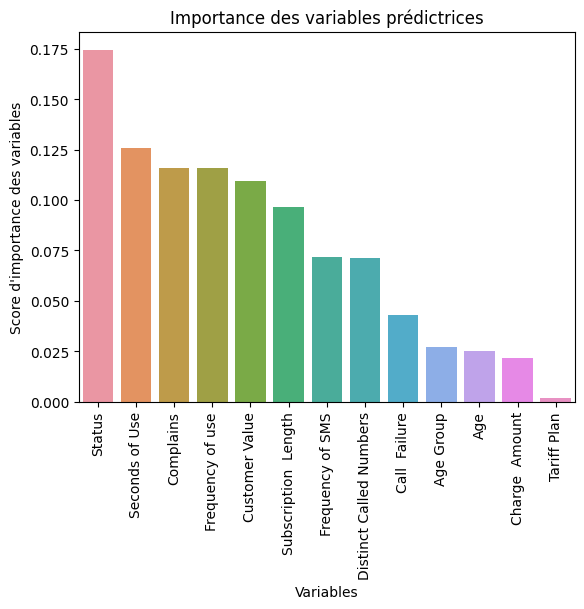

In [ ]:
#Importance des variables independante

vars_imp = pd.Series(rf.feature_importances_, index = train_features.columns).sort_values(ascending = False)

sns.barplot(x=vars_imp.index, y=vars_imp)
plt.xticks(rotation = 90)        # Afficher le nom de variables  en vartical
plt.xlabel("Variables")
plt.ylabel("Score d'importance des variables")
plt.title("Importance des variables prédictrices")
# Afficher le graphique agrandi
plt.show()


<ipython-input-58-4beeb7c6b31e>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=vars_imp.index, y=vars_imp, palette="viridis", ci=None, width=1.5)    # Modifiez la valeur de width selon vos préférences


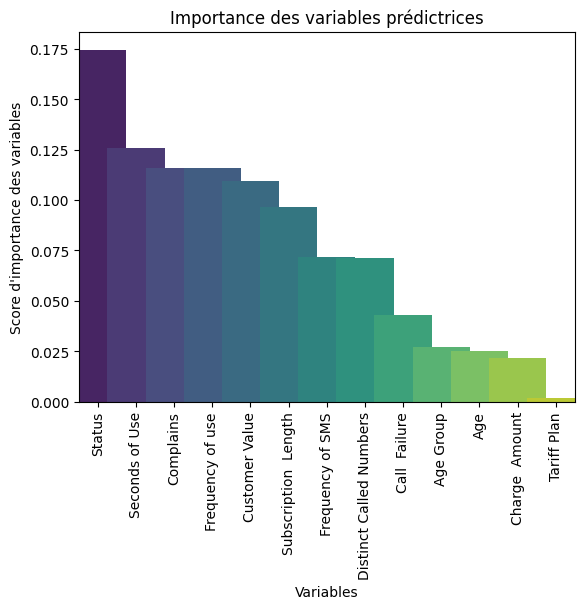

In [ ]:
# Autre representation Importance des variables independante

vars_imp = pd.Series(rf.feature_importances_, index = train_features.columns).sort_values(ascending = False)

sns.barplot(x=vars_imp.index, y=vars_imp, palette="viridis", ci=None, width=1.5)    # Modifiez la valeur de width selon vos préférences

plt.xticks(rotation = 90)
plt.xlabel("Variables")
plt.ylabel("Score d'importance des variables")
plt.title("Importance des variables prédictrices")
# Afficher le graphique agrandi
plt.show()

In [ ]:
#Affichage des variables importantes  (vars_imp) selon leur coefficients d'importance.
vars_imp

Status                     0.174654
Seconds of Use             0.125841
Complains                  0.115964
Frequency of use           0.115787
Customer Value             0.109245
Subscription  Length       0.096755
Frequency of SMS           0.071949
Distinct Called Numbers    0.071448
Call  Failure              0.042908
Age Group                  0.027238
Age                        0.025041
Charge  Amount             0.021599
Tariff Plan                0.001571
dtype: float64

In [ ]:
#Rétention de variables dant le seuil d'importance est inférieur à 0.03 pour nos algorithmes

seuil = 0.03

vars_selected = vars_imp[vars_imp>0.03].index.to_list()

train_features = train_features[vars_selected]

x_val = x_val[vars_selected]
x_test = x_test[vars_selected]

In [ ]:
#Nombre de variables prédictrices

len(vars_selected)  # ou len(tran_features.columns)

9

Finalement , 9 variables iront en modélisation

NOTRE OBJECTIF : Construire un modèle qui permet de predir si un client va se désabonner ou non.

MODELISATION : Nous aurons a utiliser differents types d'algorithmes

*La regression logistique * la Modèle de foret aléatoire * classificateurs perceptron multicouche * support vector Machine*

1-REGRESSION LOGISTIQUE

In [ ]:
#Dictionnaires des hyperparametres

param_grid = {'C':[0.001,0.01,1,10,50,100,500]}     # définition de dictionnaire des hyperparametres

#Objet GridSearchCV

grid_logreg_class = GridSearchCV(estimator=LogisticRegression(random_state=seed, max_iter=500),
                                 param_grid=param_grid,
                                 scoring='f1',
                                 cv=5)
#Entrainement de l'algorithme crée :

logreg_model = grid_logreg_class.fit(train_features,train_labels)

#Meilleur score , meilleur hyperparamètre

print(round(logreg_model.best_score_,3))

print(logreg_model.best_estimator_)


0.874
LogisticRegression(C=1, max_iter=500, random_state=111)


On obtient le meilleur score qui est de 0.874 et le meilleur C=1

Ce code crée un objet grid_logreg_class en utilisant la classe GridSearchCV de la bibliothèque scikit-learn.

 GridSearchCV est une technique qui permet de rechercher les meilleurs hyperparamètres pour un modèle donné.

Voici une explication détaillée de chaque argument passé à GridSearchCV :

estimator=LogisticRegression(random_state=seed, max_iter=500) : C'est l'estimateur de base pour lequel nous recherchons les meilleurs hyperparamètres.

Les hyperparamètres :  random_state (pour la reproductibilité) et max_iter (le nombre maximal d'itérations pour la convergence de l'algorithme de la régression logistique).

param_grid=param_grid : C'est le dictionnaire qui spécifie les combinaisons d'hyperparamètres à explorer.

scoring='f1' : C'est la métrique d'évaluation utilisée pour comparer les performances des différentes combinaisons d'hyperparamètres.

cv=5 : C'est la stratégie de validation croisée utilisée pour évaluer les performances des modèles. Ici, la validation croisée à 5 plis est utilisée, ce qui signifie que les données seront divisées en 5 ensembles de formation et de test pour évaluer les performances de chaque modèle.








En résumé, ce code crée un objet GridSearchCV pour rechercher les meilleurs hyperparamètres pour un modèle de régression logistique en utilisant le score F1 comme métrique d'évaluation. La grille des hyperparamètres à explorer est spécifiée dans param_grid, et la validation croisée à 5 plis est utilisée pour évaluer les performances. Une fois que grid_logreg_class est créé, vous pouvez l'utiliser pour effectuer la recherche des hyperparamètres et obtenir le meilleur modèle avec les paramètres optimaux.

GENERALISATION : Le modèle a un bon score d'entrainemment , maintenant évaluons le sur nos données de validations afin de voir sa capacité de généralisation.

In [ ]:
# Fonction d'évaluation de la performance du modèle

from sklearn.metrics import classification_report

def model_evaluation(model, features, labels):
  pred = model.predict(features)
  print(classification_report(labels, pred))

In [ ]:
# Evaluation du modèle de regression logistique

model_evaluation(logreg_model,x_val,y_val)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       531
           1       0.52      0.89      0.65        99

    accuracy                           0.85       630
   macro avg       0.75      0.87      0.78       630
weighted avg       0.90      0.85      0.87       630



On obtient un tableau de classification avec précision globale =0.85 , f1 score sur la classe positive qui est de 0.65 et le modèle qui se comporte bien avec la classe 0.

RFE :  Appliquons l'algorithme rfe (recursive feature eliminator) afin de voir s'il garde les memes performances lorsqu'on réduit le nombre de predicteurs.

In [ ]:
#Création de fonction de construction de modèle avec l'utilisation de l'algorithme RFE

def model_with_rfe(model):
  rfe_model = RFE(estimator = model,verbose = 0)
  rfe_model.fit(train_features,train_labels)
  mask = rfe_model.support_
  reduced_x = train_features.loc[:, mask]
  print(reduced_x.columns)
  return rfe_model

In [ ]:
#Logistic Regression RFE

rfe_logreg_model = model_with_rfe(logreg_model.best_estimator_)

rfe_logreg_model

Index(['Complains', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers'],
      dtype='object')


RFE(estimator=LogisticRegression(C=1, max_iter=500, random_state=111))

Il a utilisé 4 variables prédictrices au lieu des 9 initiales.

In [ ]:
#Evaluation du modèle de regression logistique avec RFE

model_evaluation(rfe_logreg_model,x_val,y_val)

              precision    recall  f1-score   support

           0       0.96      0.80      0.88       531
           1       0.44      0.84      0.58        99

    accuracy                           0.81       630
   macro avg       0.70      0.82      0.73       630
weighted avg       0.88      0.81      0.83       630



REF a réduit le nombre de predicteurs de 9 à 4 mais n'a pas amélioré la performance du modèle .Ce qui montre la puissance du moèle RFE

MODELE DE FORET ALEATOIRE

C'est un ensemble d'arbre de décision : les paramètres les plus important sont : le nombre d'arbres dans la foret , la profondeur maximum d'un arbred et décision.Ce sont ces deux paramètres que nouis allons régler.

In [ ]:
#Dictionnaires des hyperparamètres

param_grid_rf = {'n_estimators':[10,50,100,500,1000],'max_depth':[3,5,10,20, None],
              'max_depth':[3,5,10,20,None]}

#Objet GridSearchCV

grid_rf_class = GridSearchCV(estimator = RandomForestClassifier(random_state = seed),
                            param_grid = param_grid_rf,
                            scoring = 'f1',
                            cv = 5)
#Entrainement de l'algorithme

rf_model = grid_rf_class.fit(train_features , train_labels)

# Meilleurs scores et meilleurs hyperparamètres
print(round(rf_model.best_score_, 3))
print(rf_model.best_estimator_)

0.981
RandomForestClassifier(n_estimators=500, random_state=111)


Le meilleur score trouvé lors du processus d'ajustement est de 0.981 et le modèle avec 1000 arbres (n_estimators=1000) et une graine aléatoire de 111 (random_state=111) est celui qui a produit ce f1

In [ ]:
# Evaluation du modèle de foret aléatoire

model_evaluation(rf_model.best_estimator_,x_val,y_val)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       531
           1       0.84      0.80      0.82        99

    accuracy                           0.94       630
   macro avg       0.90      0.88      0.89       630
weighted avg       0.94      0.94      0.94       630



Comparé aux valeurs de la regression logistique ,  modèle de foret aléatoire semble plus éfficace care a des f1 scores plus élevés .

In [ ]:
#Random Forest avec RFE

rfe_forest_model = model_with_rfe(rf_model.best_estimator_)
rfe_forest_model

Index(['Status', 'Seconds of Use', 'Frequency of use', 'Customer Value'], dtype='object')


RFE(estimator=RandomForestClassifier(n_estimators=500, random_state=111))

Le RFE de foret aléatoir affiche uniquement les variables considérés :  (4)'Status', 'Seconds of Use', 'Customer Value', 'Frequency of use' .Mais les hyperparamètres n'ont pas changés.

In [ ]:
#Evaluation de modèle de foret aléatoire avec RFE :
model_evaluation(rfe_forest_model,x_val,y_val)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       531
           1       0.62      0.69      0.65        99

    accuracy                           0.89       630
   macro avg       0.78      0.80      0.79       630
weighted avg       0.89      0.89      0.89       630



max_depth=20: Cela signifie que les arbres de la forêt aléatoire auront une profondeur maximale de 20 niveaux. La profondeur d'un arbre correspond au nombre de niveaux dans l'arborescence de décision. Des arbres plus profonds peuvent capturer des relations plus complexes dans les données d'entraînement, mais cela peut également augmenter le risque de surajustement (overfitting).

CONCLUSION : Au vu de ces résultats nous retiendrons le modèle de foret aléatoire sans RFE.Donc on peut maintenant appliquer ce modèle sur les données de test.

In [ ]:
#Evaluation du model de foret aléatoire sur nos données de tests

model_evaluation(rf_model.best_estimator_,x_test,y_test)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       531
           1       0.81      0.80      0.81        99

    accuracy                           0.94       630
   macro avg       0.89      0.88      0.89       630
weighted avg       0.94      0.94      0.94       630



On remarque un résultat semsiblement égal à celui des données de validations mais en moins bon.Mais l'accurancy reste le meme.

CONCLUSION DU PROJET : NOUS AVONS POUR CE PROJET MIS EN CONCURRENCE DEUX CELEBRES MODELES DE MACHINE LEARNING ( la regression logistique et le calssificateur de foret aléatoire) ET CELUI QUE NOUS AVONS RETENU POUR L'EVALUATION DE NOS DONNEES DE TESTS EST LE CLASSIFICATEUR DE FORETS ALEATOIRE CAR IL PRESENTE UNE MEILLEUR PERFORMANCE.